In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from Configuration import Config
import json
cfg = Config()

# Set the maximum number of columns displayed to None (no limit)
pd.set_option('display.max_columns', None)

In [2]:
# Read all the folder names in the results directory

methods = os.listdir(cfg.results_loc)

print(methods)

['ForGAN-Conv-SVD', 'ForGAN-F-SVD', 'ForGAN-FFT-Conv', 'ForGAN-FT-Matrix', 'ForGAN-LS4', 'ForGAN-LSTM', 'ForGAN-SegRNN']


In [3]:
# Combine all the results into a single dataframe
all_dataframes = []
for method in methods:
    tickers = os.listdir(os.path.join(cfg.results_loc, method))
    for ticker in tickers:
        # Read the results of each ticker
        results = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'result.csv'))

        # Remove the 'Unnamed' column if it exists
        if 'Unnamed: 0' in results.columns:
            results = results.drop('Unnamed: 0', axis=1)

        # display(results)
        # Add the dataframe to the list
        all_dataframes.append(results)

# Combine all the dataframes into a single dataframe
combined_results_df = pd.concat(all_dataframes, ignore_index=True)

# Display the combined dataframe
display(combined_results_df)

,lrd,lrg,type,epochs,ticker,hid_g,hid_d,RMSE,MAE,SR_w scaled,PnL_w,Close-to-Open SR_w,Open-to-Close SR_w,Corr,Pos mn,Neg mn,narrow dist,narrow means dist,RMSE val,MAE val,PnL_w val,SR_w scaled val,Corr val,Pos mn val,Neg mn val
0,0.00001,0.00001,ForGAN-Conv-SVD,500,AMZN,8,8,0.019418,0.016435,-0.386901,-3.203771,-0.873782,0.182726,-0.083217,0.000000,1.000000,False,False,0.018176,0.016099,-4.323766,-0.627767,0.005847,0.000000,1.000000
1,0.00001,0.00001,ForGAN-Conv-SVD,500,AZO,8,8,0.013788,0.009761,-0.079250,-0.472957,-0.450059,0.131630,0.004329,0.011949,0.988051,False,False,0.013414,0.009213,-2.578954,-0.372154,0.095881,0.009200,0.990800
2,0.00001,0.00001,ForGAN-Conv-SVD,500,EL,8,8,0.012218,0.007953,-0.180662,-0.732135,-0.270783,-0.042821,0.021735,0.161765,0.838235,False,False,0.010404,0.006531,-0.941897,-0.347197,0.025620,0.107636,0.892364
3,0.00001,0.00001,ForGAN-Conv-SVD,500,GS,8,8,0.008002,0.005302,0.139296,0.149151,0.031900,0.139589,-0.029599,0.994485,0.005515,False,False,0.006518,0.004411,-0.756740,-0.989847,-0.003964,0.998160,0.001840
4,0.00001,0.00001,ForGAN-F-SVD,500,AMZN,8,8,0.010911,0.007459,0.430207,0.600915,0.096210,0.471848,0.069465,0.026654,0.973346,False,False,0.009388,0.006374,-0.556714,-0.425305,0.004128,0.011960,0.988040
5,0.00001,0.00001,ForGAN-F-SVD,500,AZO,8,8,0.014298,0.010515,0.165749,1.042408,-0.478886,0.483070,-0.000059,0.872243,0.127757,False,False,0.013834,0.009560,6.706401,1.106540,0.040353,0.899724,0.100276
6,0.00001,0.00001,ForGAN-F-SVD,500,EL,8,8,0.013353,0.008919,0.333529,2.023837,0.824447,-0.111073,-0.008881,0.795037,0.204963,False,False,0.011124,0.007508,4.664887,0.971318,0.028889,0.837167,0.162833
7,0.00001,0.00001,ForGAN-F-SVD,500,GS,8,8,0.008144,0.005445,0.103783,0.138303,-0.314388,0.358387,0.000717,0.226103,0.773897,False,False,0.006512,0.004353,0.945135,1.021087,0.020728,0.177553,0.822447
8,0.00001,0.00001,ForGAN-FFT-Conv,500,AMZN,8,8,0.014493,0.011762,0.194539,1.138967,-0.275172,0.461764,0.101607,0.002757,0.997243,False,False,0.013566,0.011384,-3.115123,-0.610172,0.001519,0.002760,0.997240
9,0.00001,0.00001,ForGAN-FFT-Conv,500,AZO,8,8,0.020613,0.015205,-0.157717,-1.175942,0.300681,-0.358096,0.000636,0.090074,0.909926,False,False,0.020764,0.014618,-8.517321,-1.253961,-0.015833,0.077277,0.922723


In [4]:
# Read all the json results from each ticker

cummulative_pnl = []
intraday_pnl = []
overnight_pnl = []
sample_distribution = []
means = []

for method in methods:
    tickers = os.listdir(os.path.join(cfg.results_loc, method))
    for ticker in tickers:
        # Read the results of each ticker
        with open(os.path.join(cfg.results_loc, method, ticker, 'PnLs.json')) as f:
            data = json.load(f)
            cummulative_pnl.append([method,ticker,data['cumPnL']])
            intraday_pnl.append([method,ticker,data['intradayCumPnL']])
            overnight_pnl.append([method,ticker,data['overnightCumPnL']])
            sample_distribution.append([method,ticker,data['sample_dist']])
            means.append([method,ticker,data['means']])

# Convert the lists to dataframes
cummulative_pnl_df = pd.DataFrame(cummulative_pnl, columns=['Method', 'Ticker', 'Cumulative PnL'])
intraday_pnl_df = pd.DataFrame(intraday_pnl, columns=['Method', 'Ticker', 'Intraday Cumulative PnL'])
overnight_pnl_df = pd.DataFrame(overnight_pnl, columns=['Method', 'Ticker', 'Overnight Cumulative PnL'])
sample_distribution_df = pd.DataFrame(sample_distribution, columns=['Method', 'Ticker', 'Sample Distribution'])
means_df = pd.DataFrame(means, columns=['Method', 'Ticker', 'Means'])

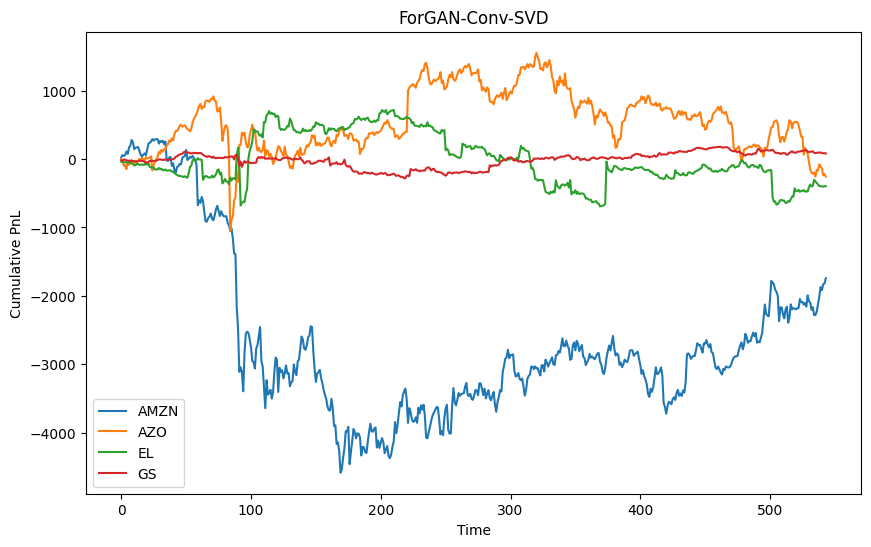

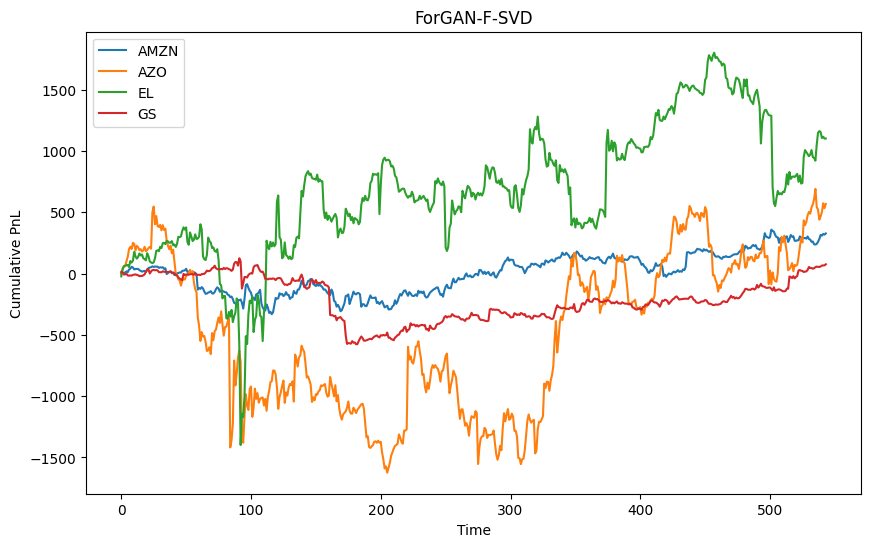

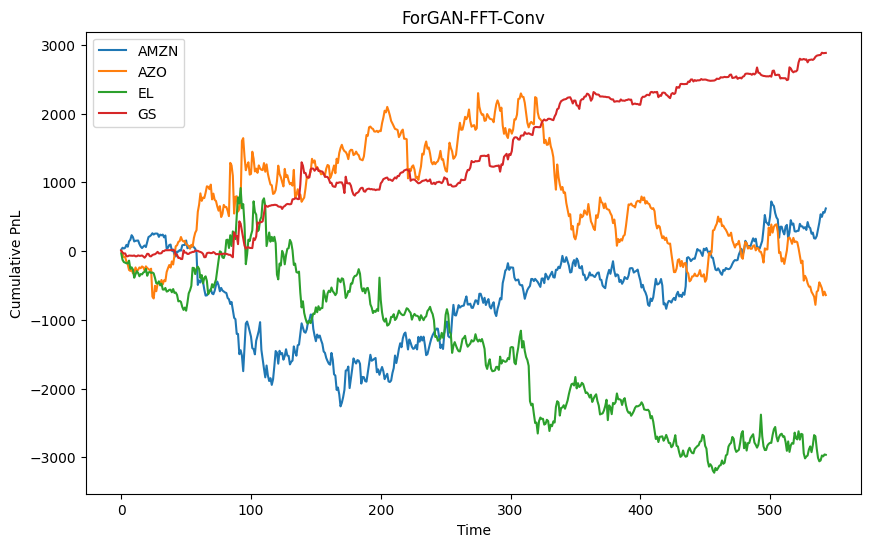

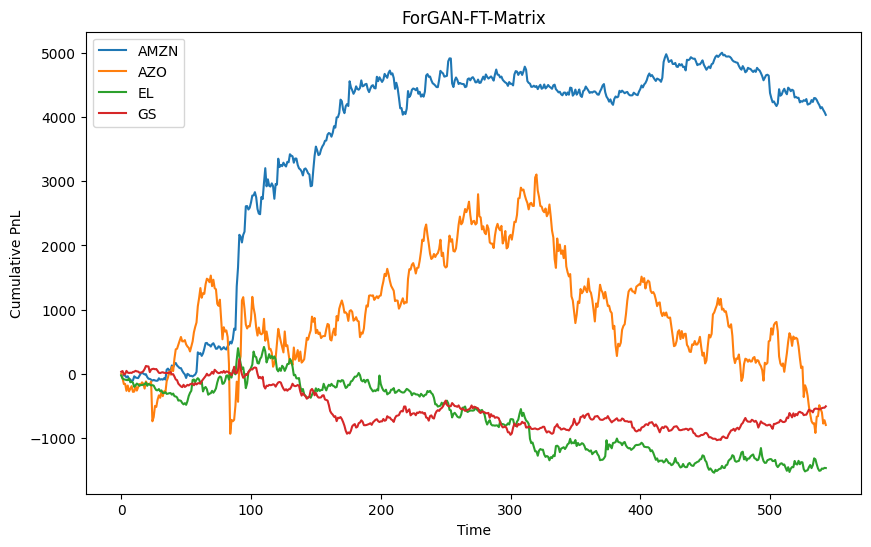

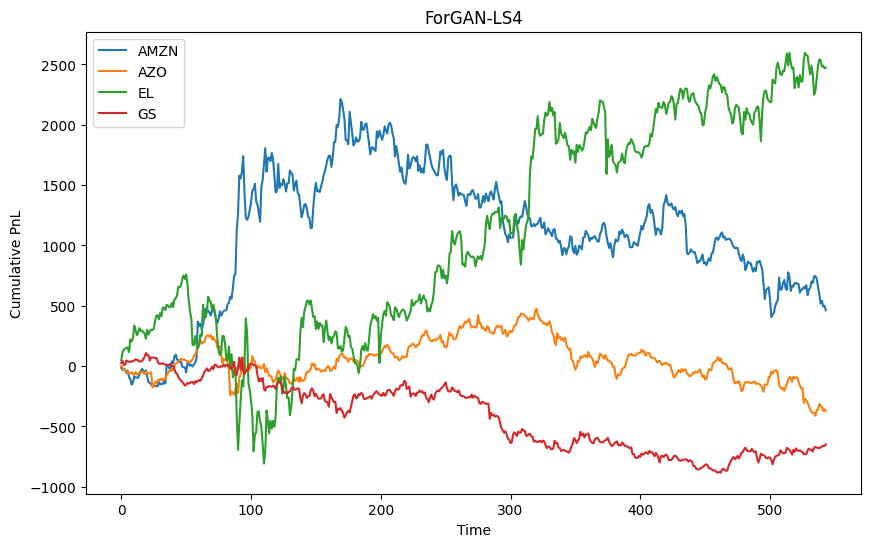

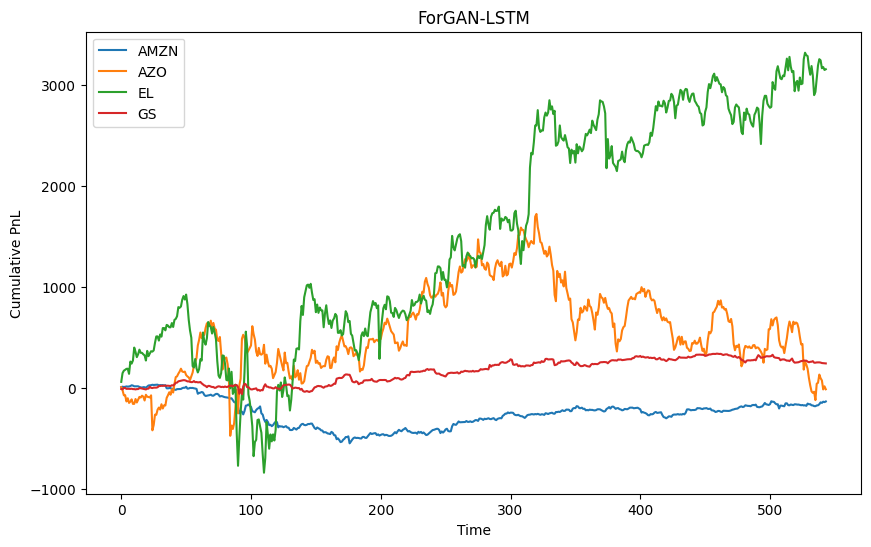

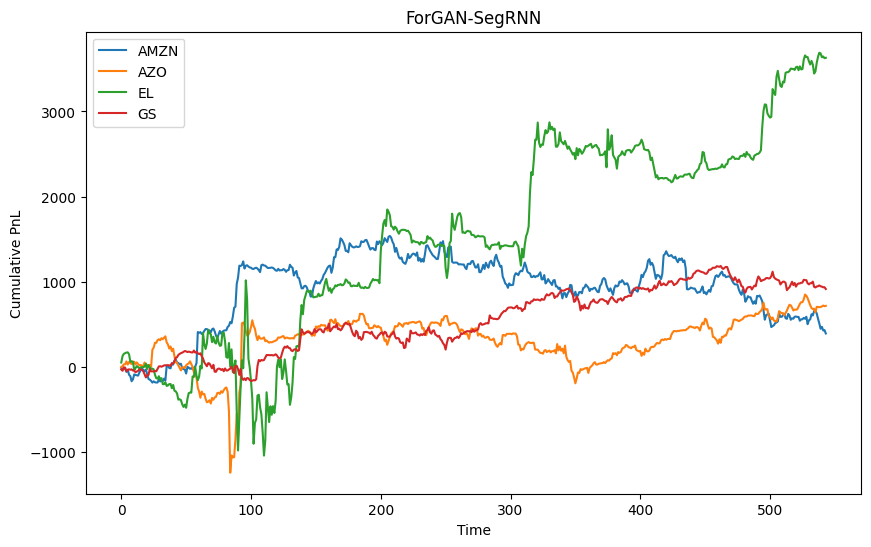

In [5]:
# Group the data by method
grouped = cummulative_pnl_df.groupby('Method')

# For each method, plot the cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Cumulative PnL')
    plt.legend()
    plt.show() 

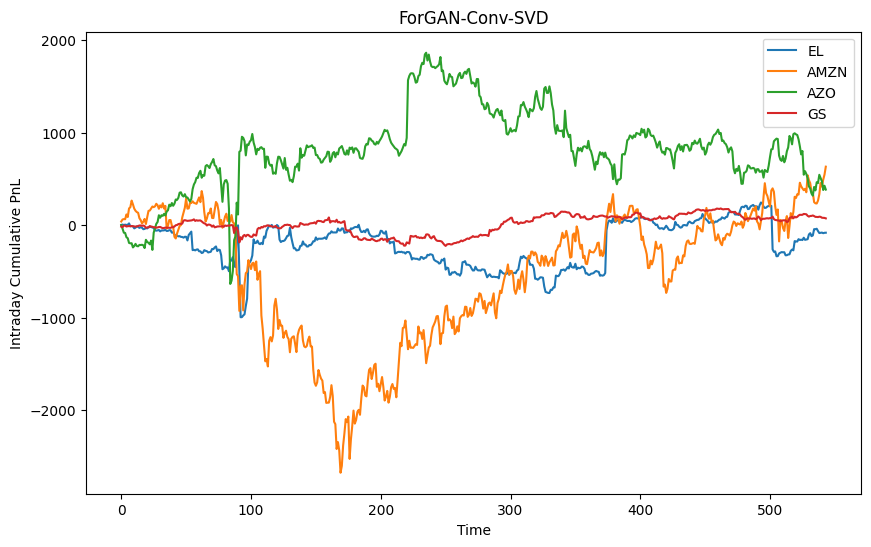

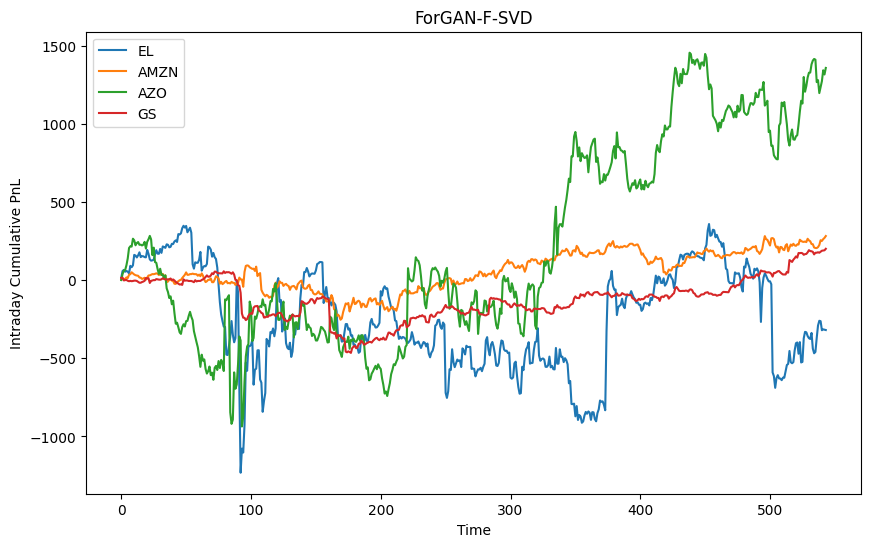

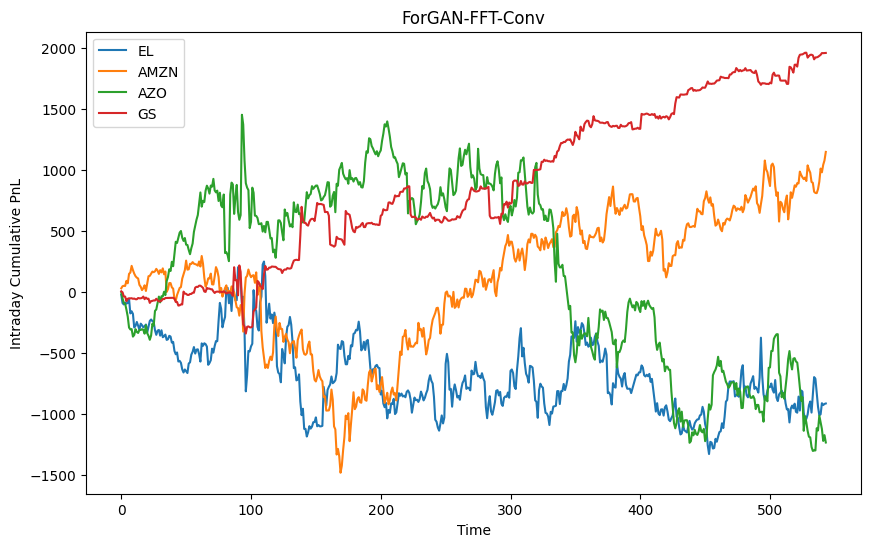

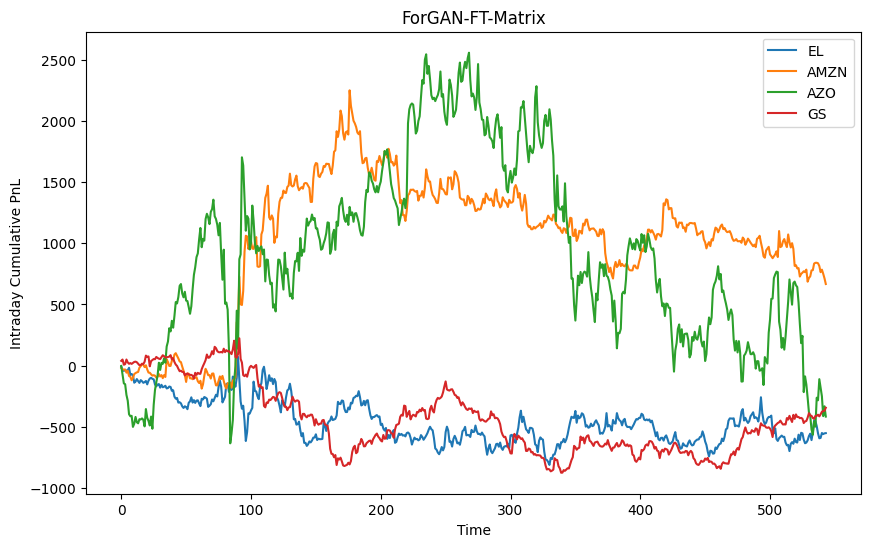

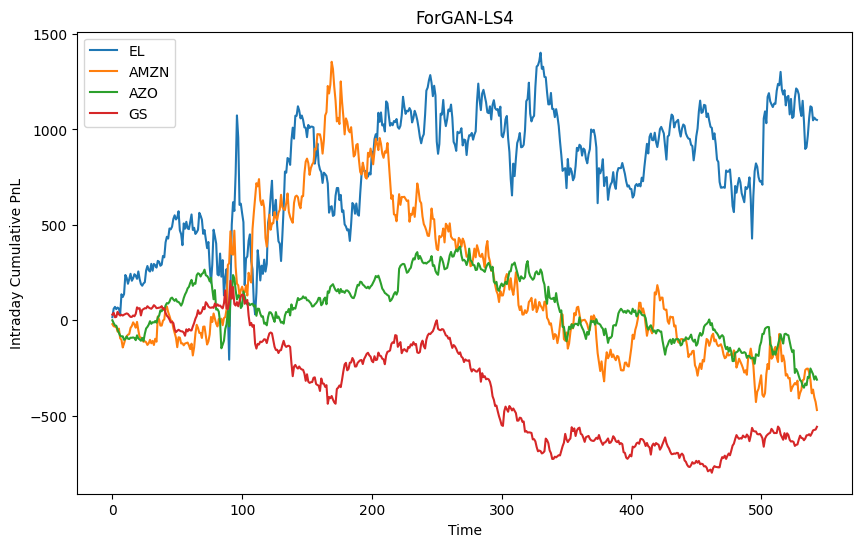

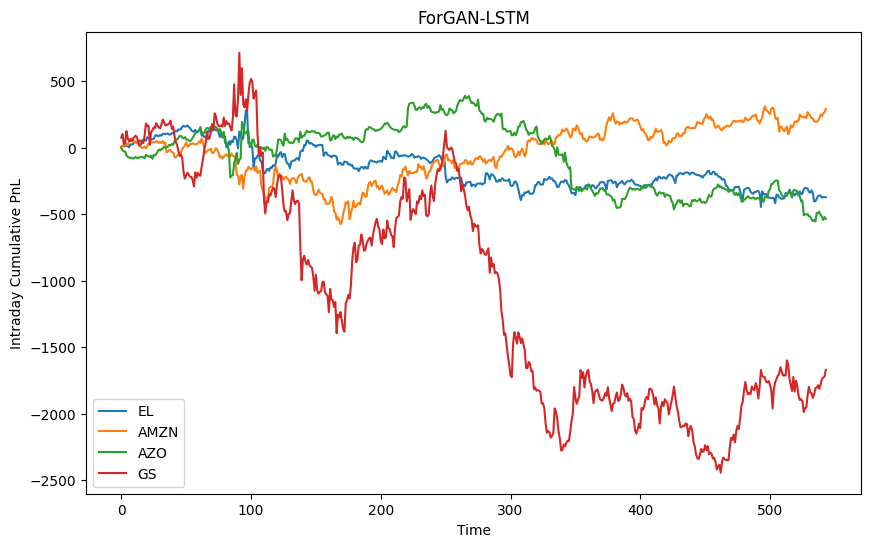

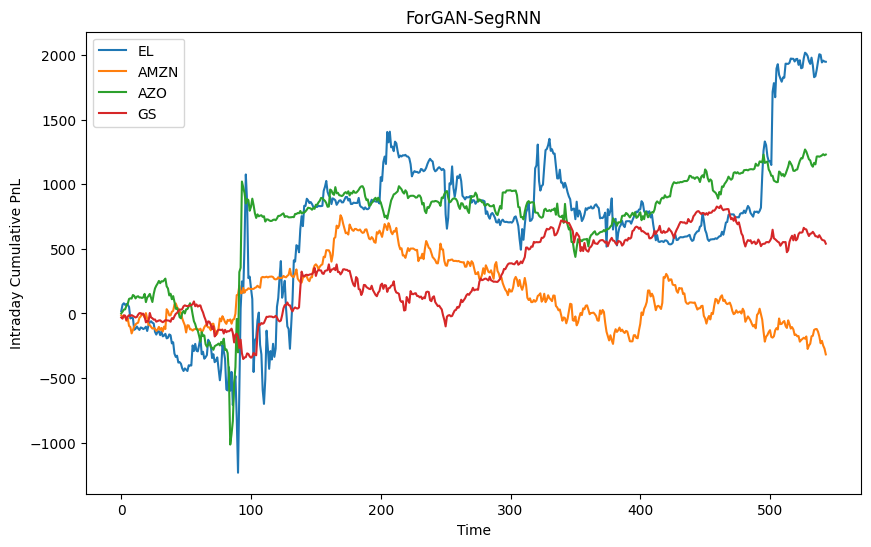

In [18]:
start_date = cfg.test_start_date

# Group the data by method
grouped = intraday_pnl_df.groupby('Method')

# For each method, plot the intraday cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Intraday Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Intraday Cumulative PnL')
    plt.legend()
    plt.show()

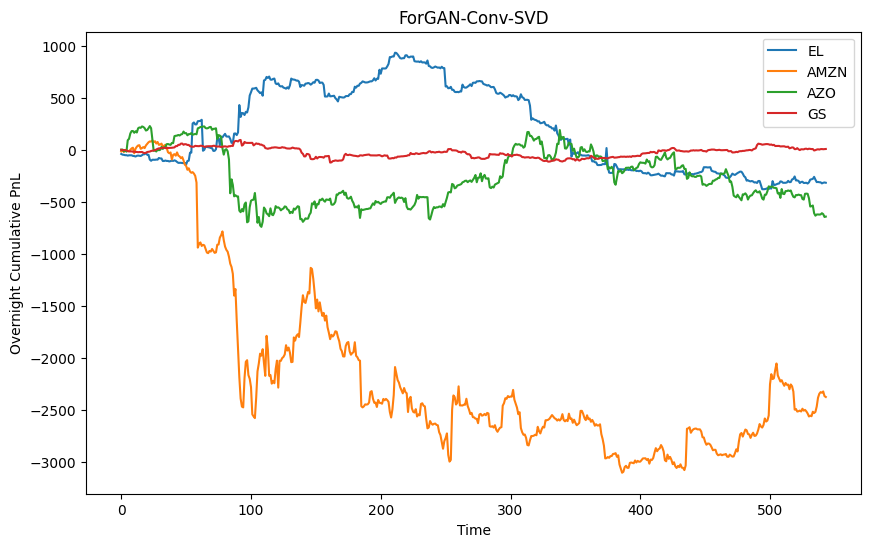

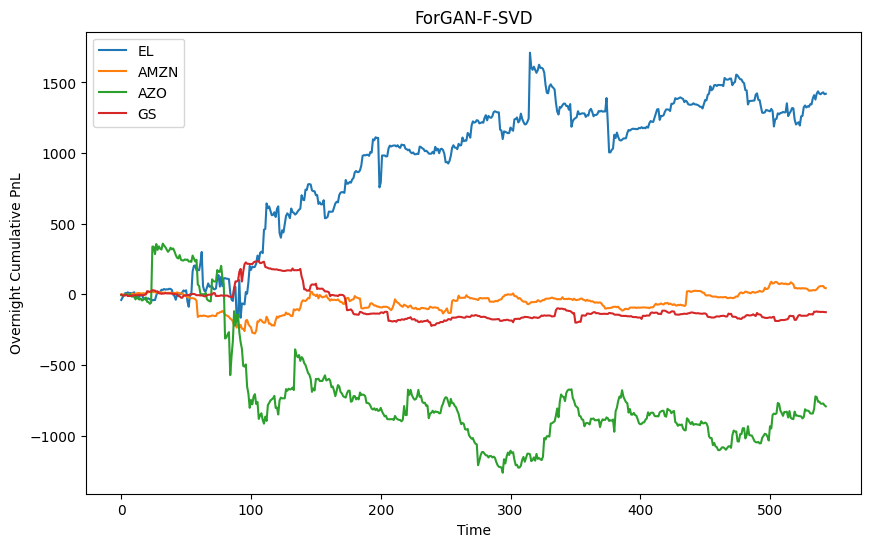

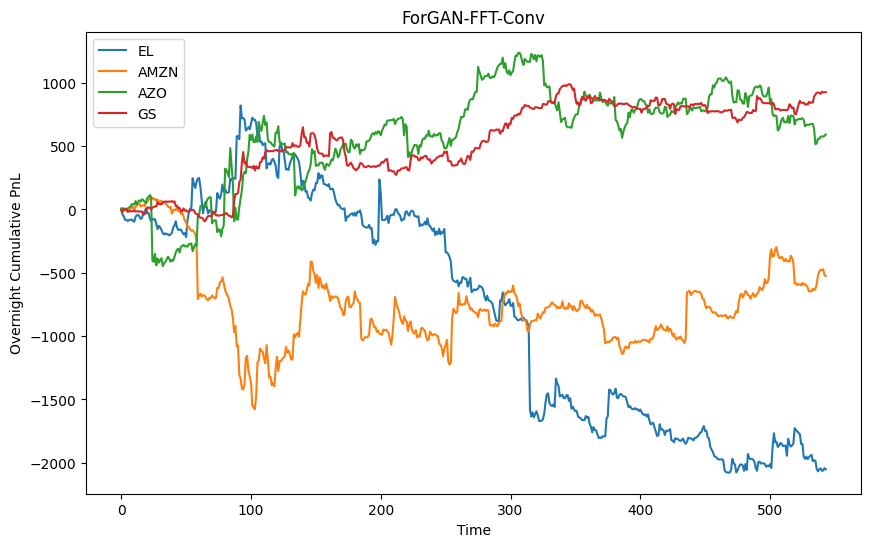

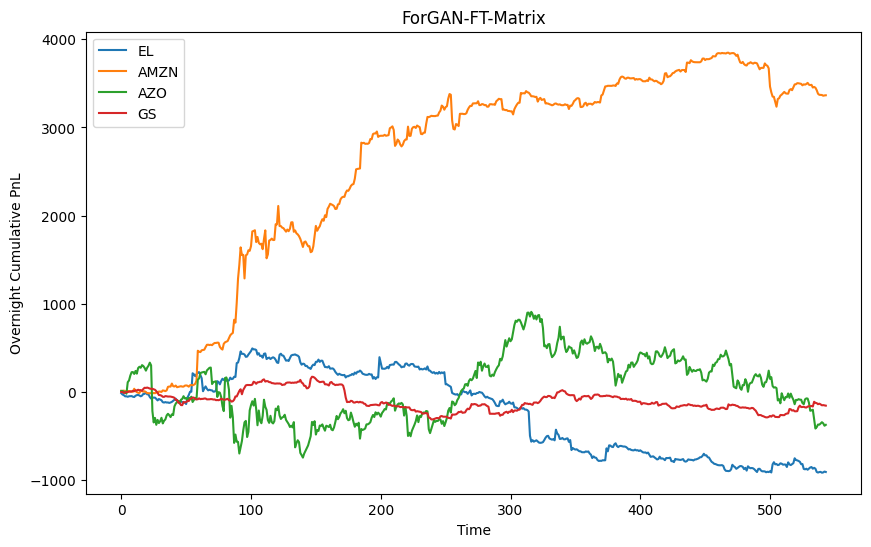

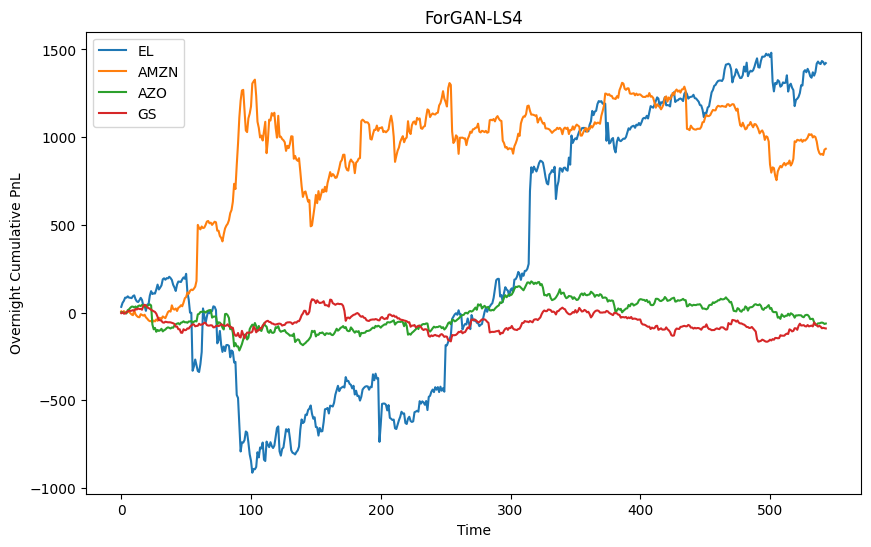

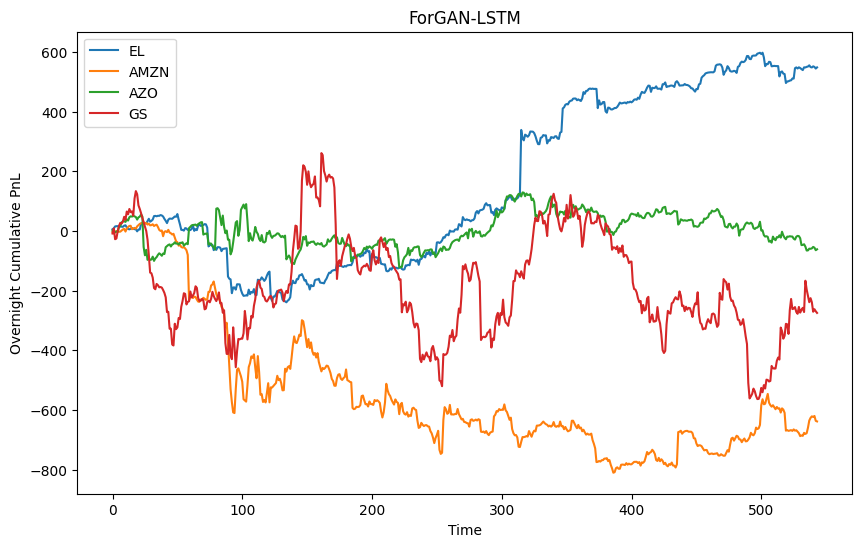

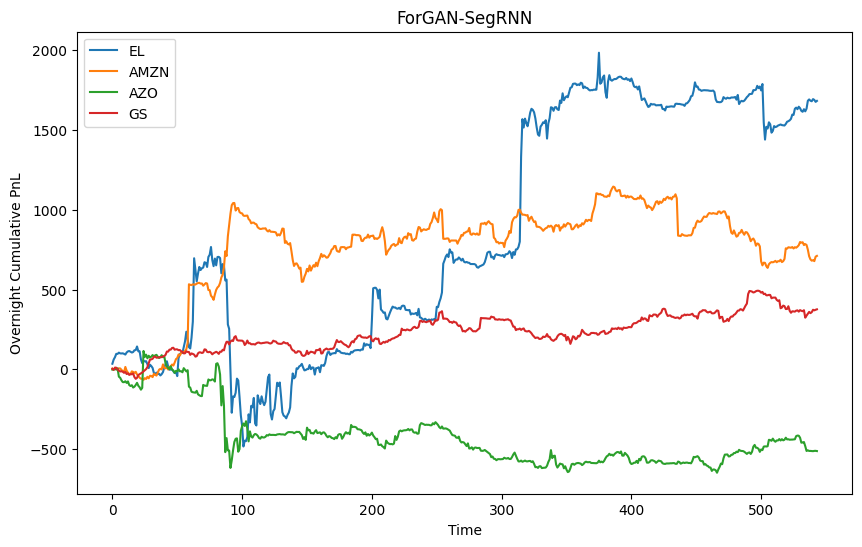

In [19]:

# Group the data by method
grouped = overnight_pnl_df.groupby('Method')

# For each method, plot the overnight cumulative PnL for all tickers
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        plt.plot(group.loc[i, 'Overnight Cumulative PnL'], label=group.loc[i, 'Ticker'])
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('Overnight Cumulative PnL')
    plt.legend()
    plt.show()

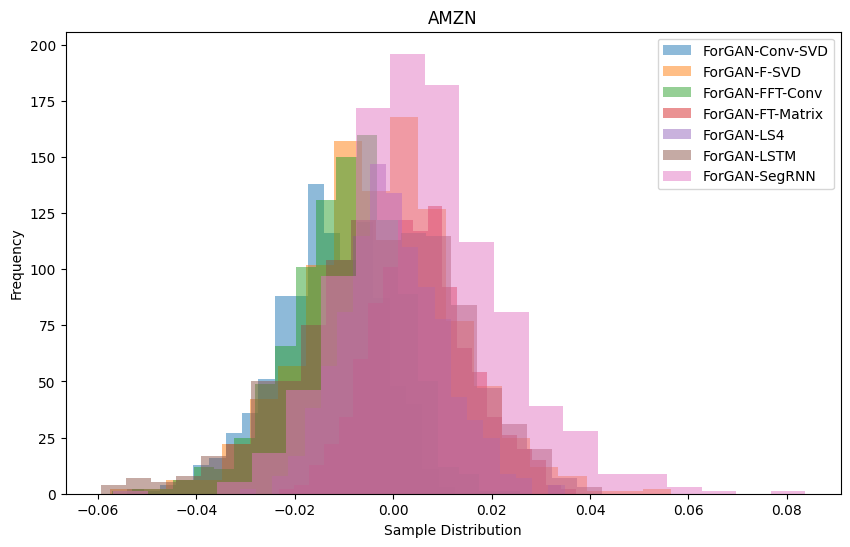

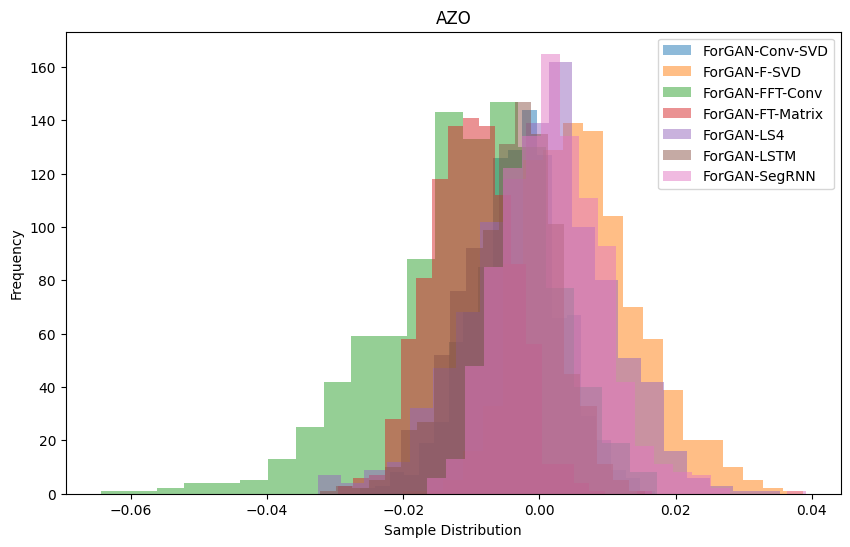

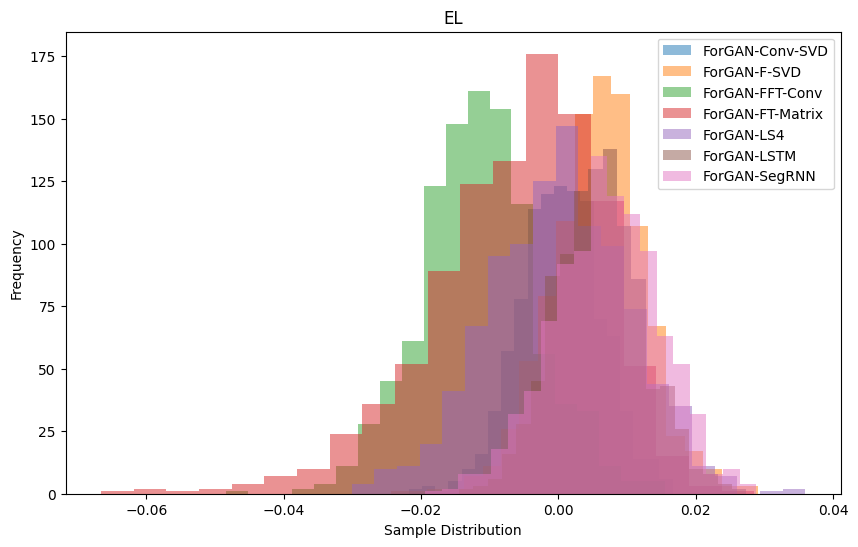

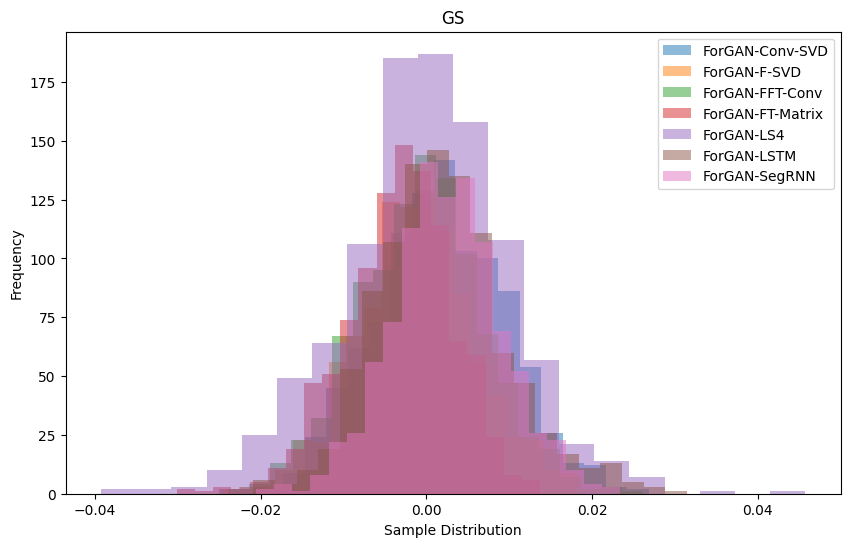

In [6]:
# Group the data by ticker
grouped = sample_distribution_df.groupby('Ticker')
# For each ticker, plot the sample distribution for all methods
for name, group in grouped:
    plt.figure(figsize=(10, 6))
    for i in group.index:
        if group.loc[i, 'Method'] == 'ForGAN-LS4':  
            grp_mean, grp_std = np.mean(group.loc[i, 'Sample Distribution']), np.std(group.loc[i, 'Sample Distribution'])
            plt.hist(np.array(group.loc[i, 'Sample Distribution']-grp_mean)/grp_std*0.01, label=group.loc[i, 'Method'], alpha=0.5, bins=20)
        else:
            plt.hist(group.loc[i, 'Sample Distribution'], label=group.loc[i, 'Method'], alpha=0.5, bins=20)
    plt.title(name)
    plt.xlabel('Sample Distribution')
    plt.ylabel('Frequency')
    plt.legend() 
    plt.show()
    

# Regime Analysis

In [122]:
methods = os.listdir(cfg.results_loc)

print(methods)

method = 'ForGAN-LSTM'

print(method)

tickers = os.listdir(os.path.join(cfg.results_loc, method))
print(tickers)

ticker = 'AMZN'

print(ticker)

excess_returns_train = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'excess_returns_train.csv'))
excess_returns_test_pred = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'excess_returns_test_real.csv'))
excess_returns_val_pred = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'excess_returns_val_real.csv'))


['ForGAN-Conv-SVD', 'ForGAN-F-SVD', 'ForGAN-FFT-Conv', 'ForGAN-FT-Matrix', 'ForGAN-LS4', 'ForGAN-LSTM', 'ForGAN-SegRNN']
ForGAN-LSTM
['AMZN', 'AZO', 'EL', 'GS']
AMZN


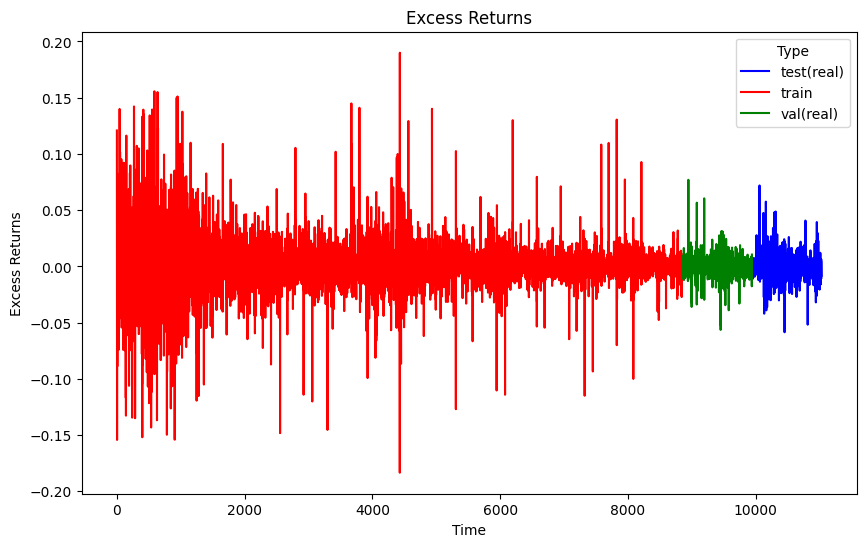

In [123]:
excess_returns_train['type'] = 'train'
excess_returns_test_pred['type'] = 'test(real)'
excess_returns_val_pred['type'] = 'val(real)'

# concat 'excess_returns' and 'type' columns

excess_returns = pd.concat([excess_returns_train,excess_returns_val_pred, excess_returns_test_pred])
#reset index
excess_returns = excess_returns.reset_index(drop=True)



color_map = {'train': 'red', 'val(real)': 'green', 'test(real)': 'blue'}
    
# Create a figure
plt.figure(figsize=(10, 6))

# Group by 'type' and plot each group
for key, group in excess_returns.groupby('type'):
    plt.plot(group.index, group['excess_returns'], label=key, color=color_map[key])

# Add title and labels
plt.title('Excess Returns')
plt.xlabel('Time')
plt.ylabel('Excess Returns')
plt.legend(title='Type')
plt.show()

In [110]:
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

In [111]:
# Define a function to fit the HMM on given data
def fit_hmm(data):
    # Set up the parameter grid for HMM
    n_components_list = [2, 3]  # Vary number of hidden states
    covariance_type_list = ['full', 'diag', 'tied']  # Try different covariance types
    n_iter_list = [100, 200, 300]  # Different numbers of iterations
    random_state_list = [42, 100, 200]  # Try different random seeds
    best_score = -np.inf
    best_params = None
    best_model = None



    for n_components in n_components_list:
        for covariance_type in covariance_type_list:
            for n_iter in n_iter_list:
                for random_state in random_state_list:
                    try:
                        # Initialize and fit the HMM model
                        model = hmm.GaussianHMM(n_components=n_components, covariance_type=covariance_type,
                                                n_iter=n_iter, random_state=random_state, init_params='mc')

                        # Initialize start probabilities and transition matrix
                        model.startprob_ = np.ones(n_components) / n_components
                        transmat = np.full((n_components, n_components), 1 / n_components)
                        np.fill_diagonal(transmat, 0.7)

                        # Normalize the transition matrix to ensure each row sums to 1
                        row_sums = transmat.sum(axis=1, keepdims=True)
                        transmat = transmat / row_sums
                        model.transmat_ = transmat

                        # Fit the model
                        model.fit(data)

                        # Get the log likelihood score
                        score = model.score(data)

                        # Save the best model
                        if score > best_score:
                            best_score = score
                            best_params = {
                                'n_components': n_components,
                                'covariance_type': covariance_type,
                                'n_iter': n_iter,
                                'random_state': random_state
                            }
                            best_model = model

                    except Exception as e:
                        print(
                            f"Model failed to converge with params: n_components={n_components}, covariance_type={covariance_type}, n_iter={n_iter}, random_state={random_state}. Error: {e}")
                        continue

    return best_model, best_params, best_score




In [112]:
scaled_data = StandardScaler().fit_transform(excess_returns['excess_returns'].values.reshape(-1, 1))

model, params, score = fit_hmm(scaled_data)


regimes = model.predict(scaled_data)

print(len(excess_returns['excess_returns']))
print(len(regimes))
print(len(scaled_data))

excess_returns['regime'] = regimes

# find number of unique regimes
unique_regimes = excess_returns['regime'].unique()
print(unique_regimes)

11031
11031
11031
[1 2 0]


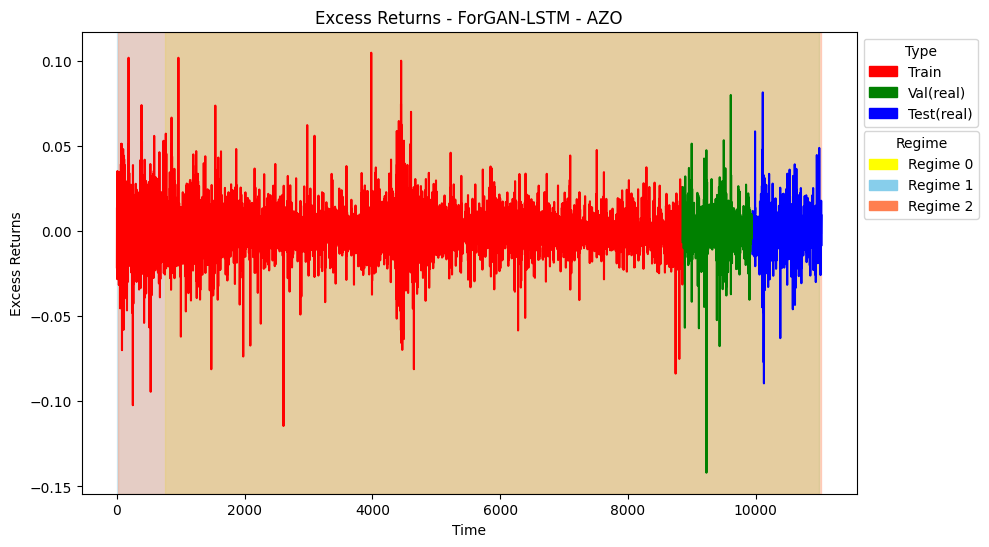

In [113]:
# Define the color map for the regimes
regime_color_map = {0: 'lightgrey', 1: 'lightblue', 2: 'lightgreen', 3: 'lightcoral', 4: 'lightyellow'}
regime_color_map = {0: 'yellow', 1: 'skyblue', 2: 'coral'}


# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the excess returns grouped by type
color_map = {'train': 'red', 'val(real)': 'green', 'test(real)': 'blue'}
for key, group in excess_returns.groupby('type'):
    ax.plot(group.index, group['excess_returns'], label=key, color=color_map[key])

# Highlight the background based on the regime values
for regime, group in excess_returns.groupby('regime'):
    ax.axvspan(group.index.min(), group.index.max(), color=regime_color_map[regime], alpha=0.3)

# Add title and labels
ax.set_title('Excess Returns'+ ' - ' + method + ' - ' + ticker)
ax.set_xlabel('Time')
ax.set_ylabel('Excess Returns')

# Create custom legend for regimes
regime_patches = [mpatches.Patch(color=color, label=f'Regime {regime}') for regime, color in regime_color_map.items()]

# Create custom legend for types
type_patches = [mpatches.Patch(color=color, label=key.capitalize()) for key, color in color_map.items()]

# Add the type legend
type_legend = ax.legend(handles=type_patches, title='Type', loc='upper left', bbox_to_anchor=(1, 1))

# Add the regime legend
regime_legend = ax.legend(handles=regime_patches, title='Regime', loc='upper left', bbox_to_anchor=(1, 0.8))

# Add the type legend back to the plot
ax.add_artist(type_legend)

# Show the plot
plt.show()

In [114]:
excess_returns_test_pred = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'excess_returns_test_real.csv'))
excess_returns_val_pred = pd.read_csv(os.path.join(cfg.results_loc, method, ticker, 'excess_returns_val_real.csv'))

excess_returns_test_pred['type'] = 'test(pred)'
excess_returns_val_pred['type'] = 'val(pred)'

excess_returns_pred = pd.concat([excess_returns_val_pred, excess_returns_test_pred])
excess_returns_pred = excess_returns_pred.reset_index(drop=True)

scaled_data_pred = StandardScaler().fit_transform(excess_returns_pred['excess_returns'].values.reshape(-1, 1))

regimes_pred = model.predict(scaled_data_pred)

excess_returns_pred['regime'] = regimes_pred



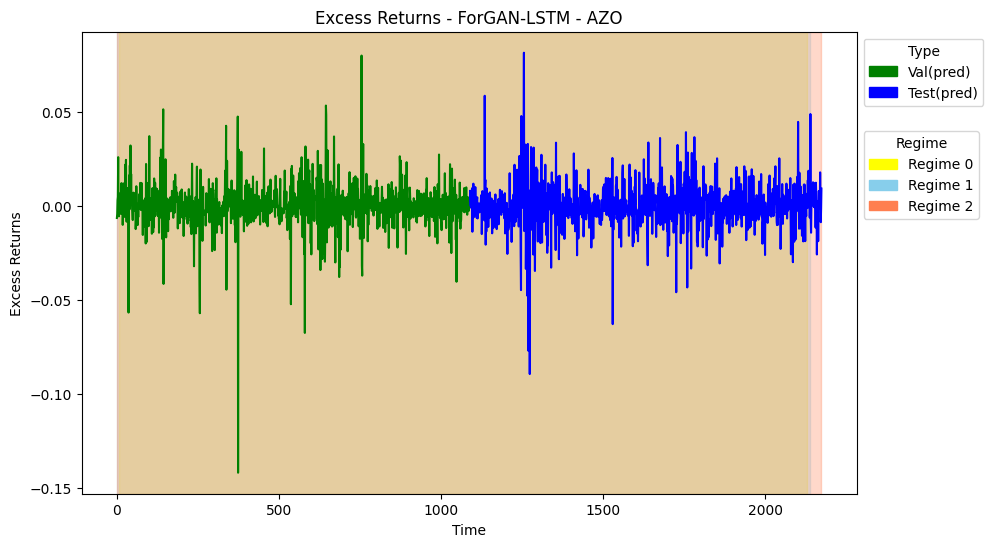

In [116]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the excess returns grouped by type
color_map = {'val(pred)': 'green', 'test(pred)': 'blue'}
for key, group in excess_returns_pred.groupby('type'):
    ax.plot(group.index, group['excess_returns'], label=key, color=color_map[key])

# Highlight the background based on the regime values
for regime, group in excess_returns_pred.groupby('regime'):
    ax.axvspan(group.index.min(), group.index.max(), color=regime_color_map[regime], alpha=0.3)

# Add title and labels
ax.set_title('Excess Returns'+ ' - ' + method + ' - ' + ticker)
ax.set_xlabel('Time')
ax.set_ylabel('Excess Returns')

# Create custom legend for regimes
regime_patches = [mpatches.Patch(color=color, label=f'Regime {regime}') for regime, color in regime_color_map.items()]

# Create custom legend for types
type_patches = [mpatches.Patch(color=color, label=key.capitalize()) for key, color in color_map.items()]

# Add the type legend
type_legend = ax.legend(handles=type_patches, title='Type', loc='upper left', bbox_to_anchor=(1, 1))

# Add the regime legend
regime_legend = ax.legend(handles=regime_patches, title='Regime', loc='upper left', bbox_to_anchor=(1, 0.8))

# Add the type legend back to the plot
ax.add_artist(type_legend)

# Show the plot
plt.show()